# Práctica Final Prompt Engineering Avanzado - KeepCoding
En esta práctica vamos a poner en práctica todas las técnicas de prompt engineering vistas en clase para resolver dos problemas:
* Crear un prompt para resolver tareas repetitivas de forma automática. En este caso se va a crear un prompt para generar publicaciones de LinkedIn de la forma más profesional posible y con el ojetivo de que las publicaciones se viralicen. 
* Desarrollar un script para automatizar la tarea elegida con el prompt desarrollada en el primer ejercicio. 
## Ejercicio 1 - Prompt para generar publicaciones de Linkedin Virales
Para la solución de este prompt se van a utilizar varias técnicas, en primer lugar vamos a utilizar **RolePlay** para decirle a ChatGPT que es un experto en generar publicaciones virales de LinkedIn. 
También se le va a incluir un contexto sobre qué temáticas quiero que genere los posts. Para ello, le voy a explicar ciertos temas sobre los que trabajo. Estas temáticas son:
- Ciberseguridad
- Cloud Computing
- Inteligencia Artificial
- Azure 
- Zero Trust 

Por ello, de momento el prompt luciría así:
*Eres un experto en crear publicaciones de LinkedIn virales. Quiero que me ayudes a crear post virales de LinkedIn para mi cuenta profesional sobre las siguientes áreas: Ciberseguridad, Cloud Computing, Inteligencia Artificial, Azure y Zero Trust.*

Lanzando el prompt, nos da ideas para generar publicaciones de cada una de estas áreas:
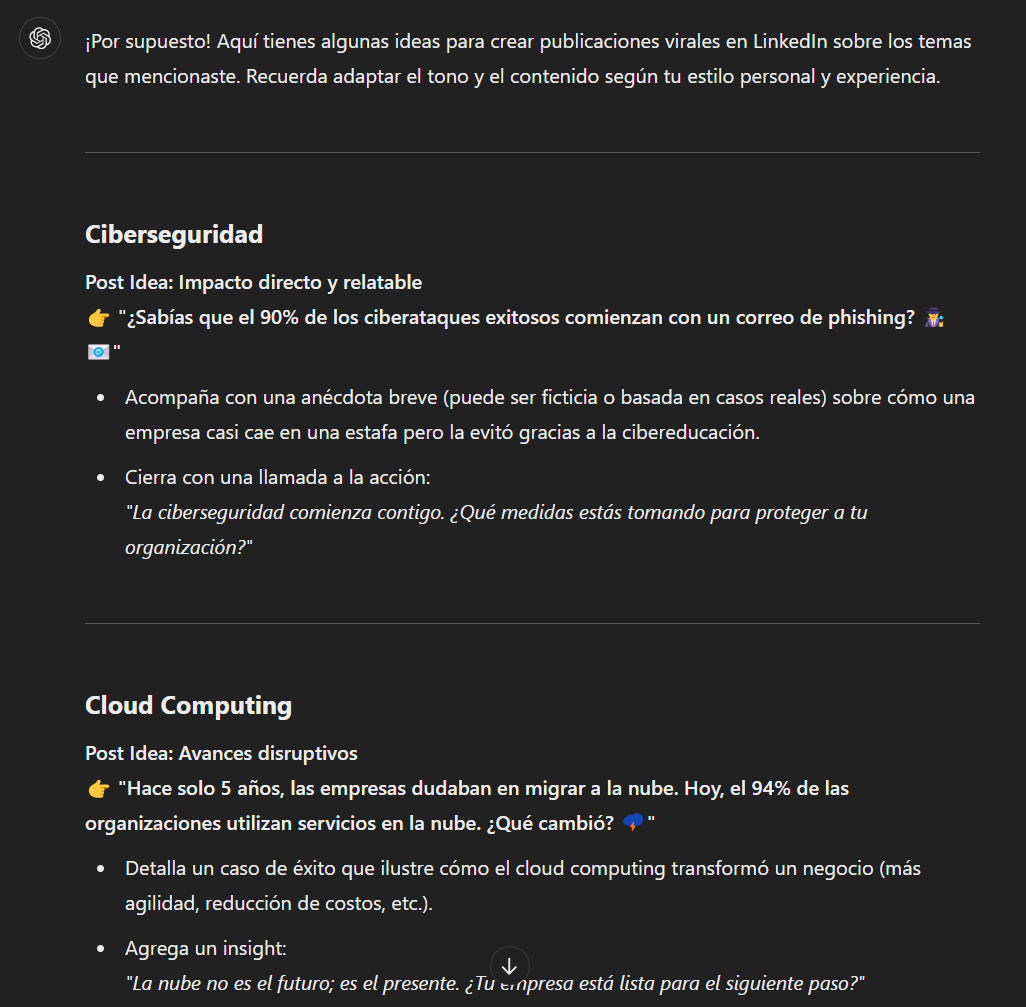
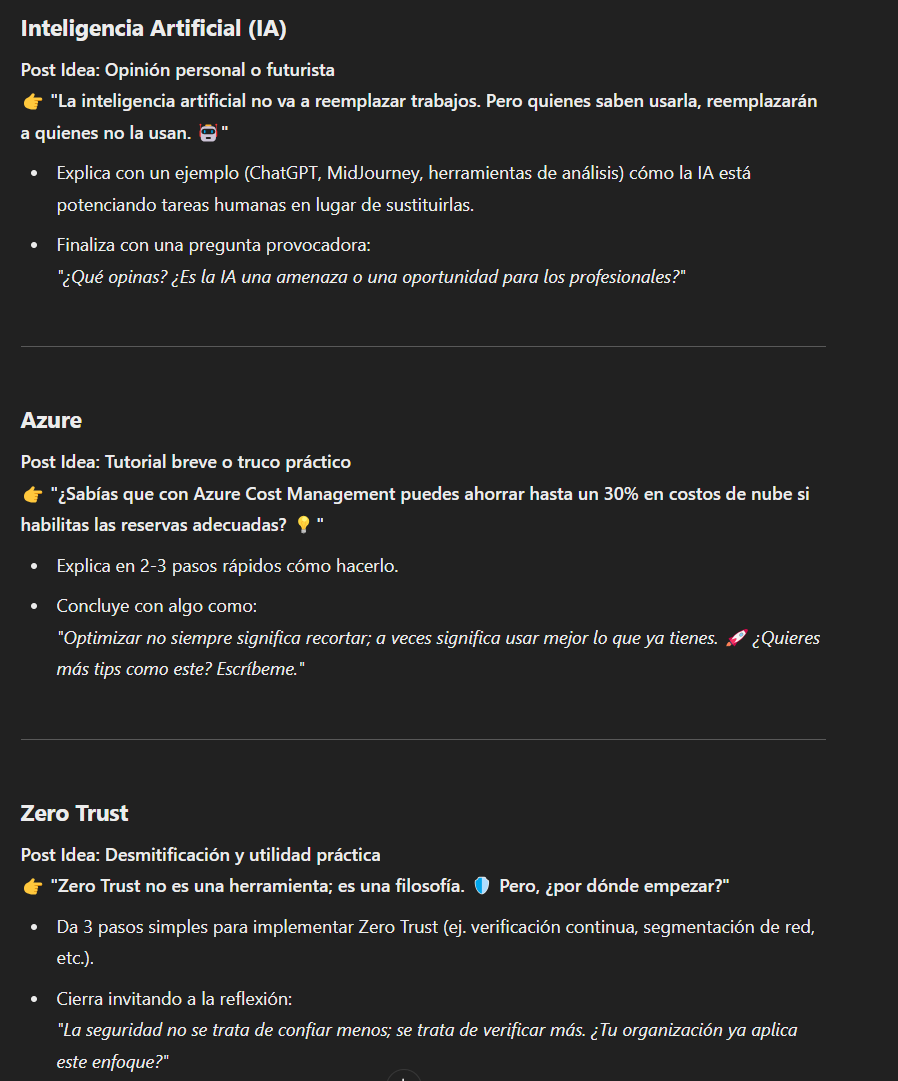


Viendo la respuesta, me gustan las ideas que tiene pero veo que de momento no generar publicaciones completas. Esto es porque todavía no le he dicho la **instrucción** que debe realizar. Por ello, lo próximo es decirle qué quiero que haga:

*Quiero que realices una publicación viral completa de alguna de las areas definidas utilizando emojis y hastagsh para llegar a más gente. Necesito que sobretodo las primeras líneas llamen mucho la atención para que la gente quiera leer la publicación completa.*

Vemos que ahora ya nos genera una publicación completa bastante buena:
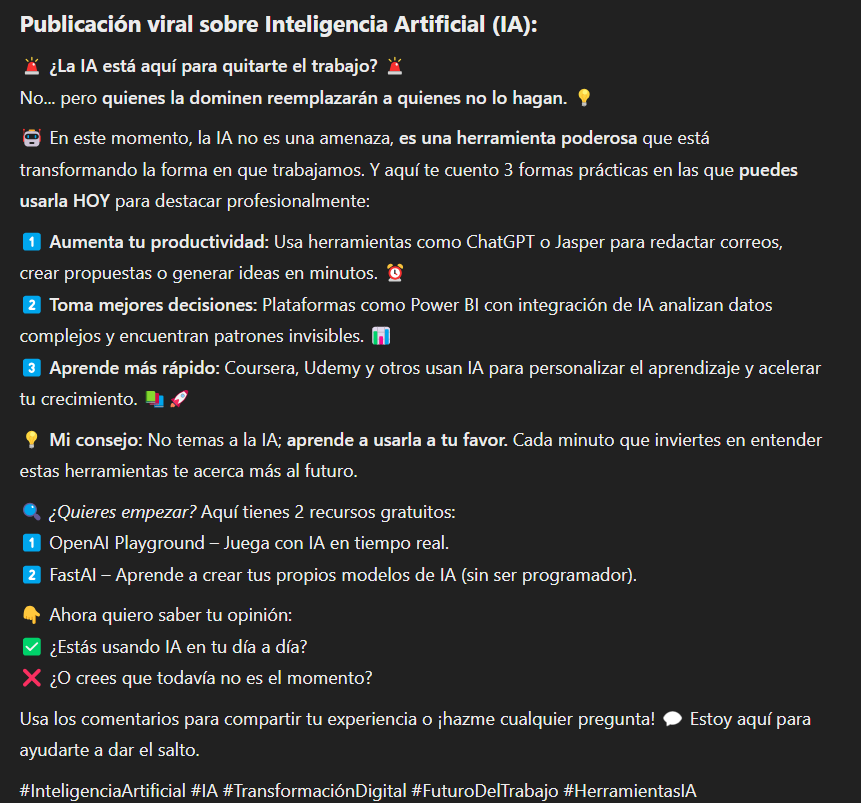


De momento me gusta bastante el resultado, pero si el objetivo es automatizar todo lo posible esta tarea y con este prompt solo genera una publicación de una sola área, voy a generar un condicional para que elija un área concreta en función del día del mes que sea. Para ello, quiero que calcule el módulo 5 del día del mes, así pues el resto va a ser el índice de la lista de temáticas seleccionada. Como sabemos que los LLMs por ahora no hacen operaciones como tal, sino que predicen resultados, le voy a dar **ejemplos** para que entienda perfectamente lo que tiene que hacer:  

*Teniendo en cuenta las áreas vistas y su orden, quiero que elijas la temática sobre la que generar la publicación basándote en el día del mes y calculándo el módulo 5 del día del mes. Esto consiste en calcular el resto de la división del día del més entre 5, y con ese resto elegir manteniendo el orden una de las temáticas. Por ejemplo, si el resto de la división es 0, la temática será ciberseguridad. Si el resto es 3 la temática sera Azure.*

Vemos que GhatGPT ha entendido perfectamente el condicional, eligiendo a día 22 de diciembre el área Inteligencia artificial ya que 22 % 5 = 2, y el índice 2 es Inteligencia Artificial (empezando a contar en 0):
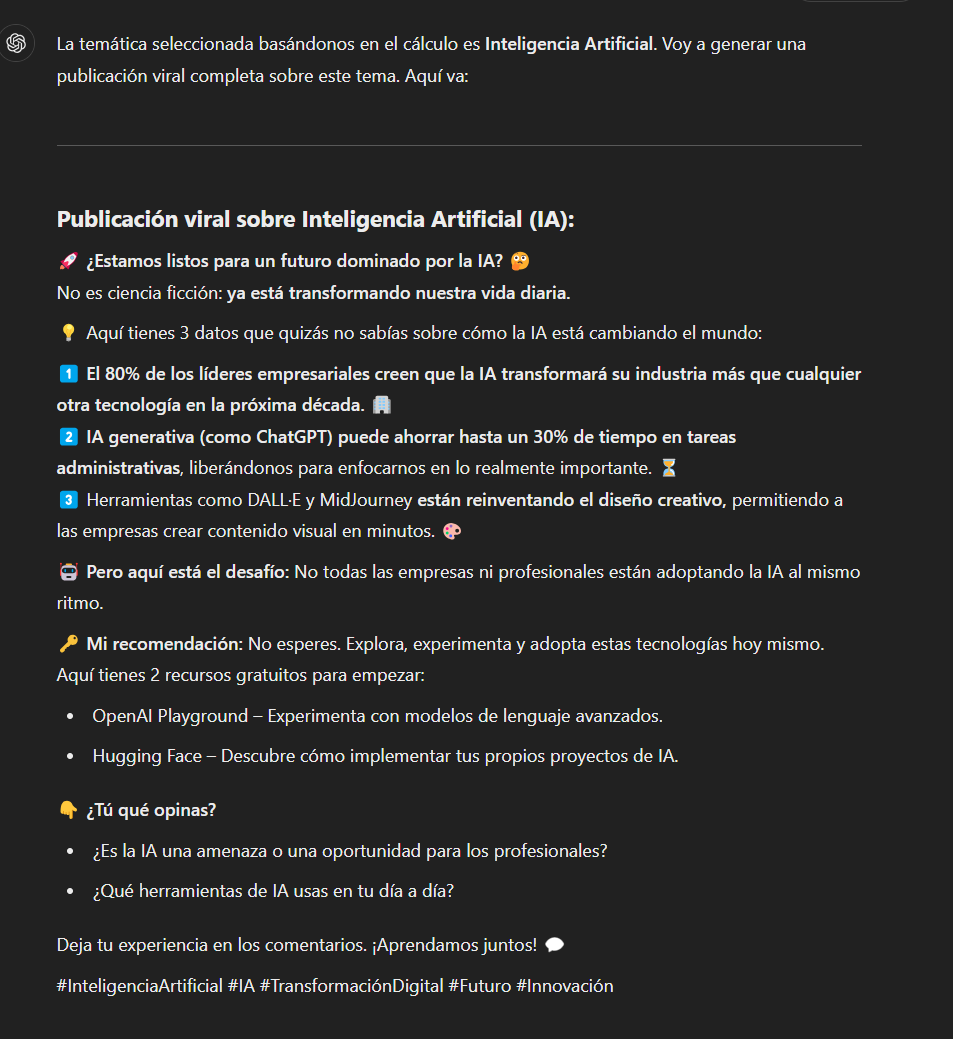


Para confirmar que lo ha entendido, le voy a decir que actúe como si hoy fuera 24 en vez de 22, eliginedo así la temática Zero Trust:
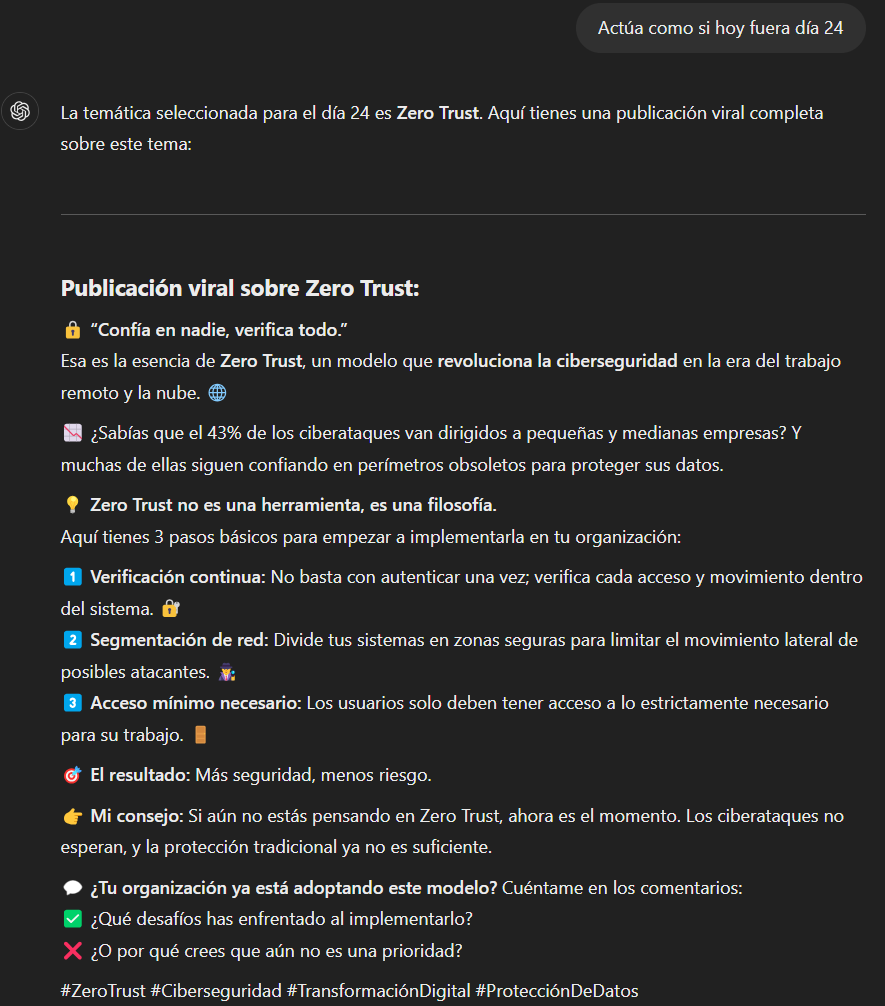


Es importante remarcar que en el proceso de desarrollo del prompt, se está haciendo uso de la técnica de **Prompt Chaining**.

Por último, quiero que la publicación genere una llamada a la acción a los seguidores que lean la publicación. Esto puede ser suscribirse a mi newsletter (ficticio) o dejándome un comentario. 

*Estas publicaciones deben generar una llamada a la acción en el lector, invitándole a suscribirse a mi newsletter fijada en el primer comentario del post o dejándo un comentario.*
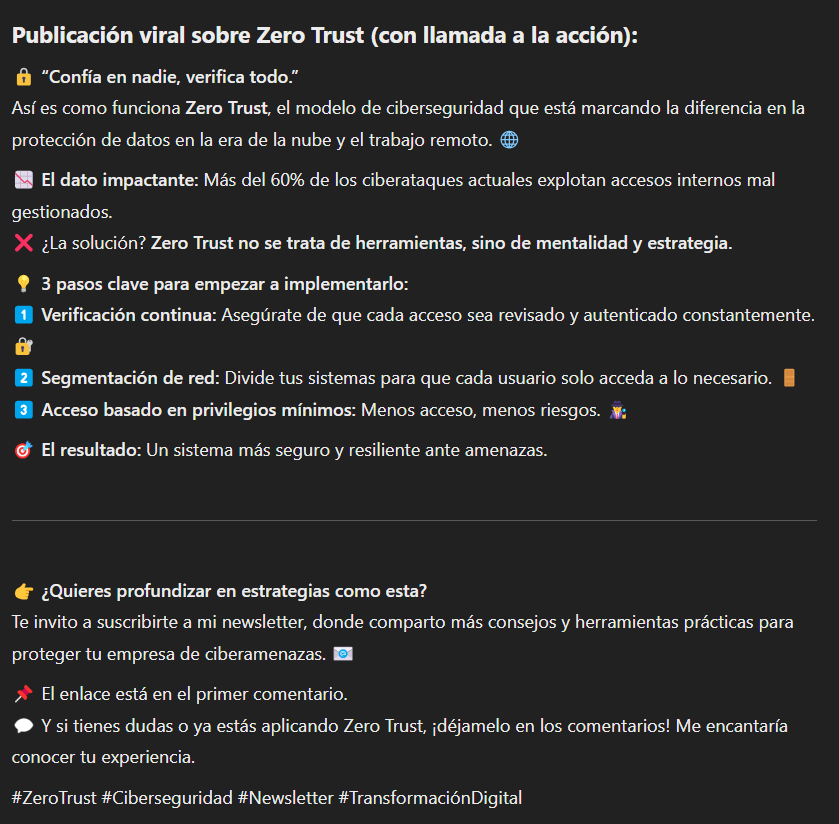


Estoy bastante contento con el resultado del prompt, quedando finalmente así:

Eres un experto en crear publicaciones de LinkedIn virales. Quiero que me ayudes a crear post virales de LinkedIn para mi cuenta profesional sobre las siguientes áreas: Ciberseguridad, Cloud Computing, Inteligencia Artificial, Azure y Zero Trust.
Quiero que realices una publicación viral completa de alguna de las areas definidas utilizando emojis y hastagsh para llegar a más gente. Necesito que sobretodo las primeras líneas llamen mucho la atención para que la gente quiera leer la publicación completa.
Teniendo en cuenta las áreas vistas y su orden, quiero que elijas la temática sobre la que generar la publicación basándote en el día del mes y calculándo el módulo 5 del día del mes. Esto consiste en calcular el resto de la división del día del més entre 5, y con ese resto elegir manteniendo el orden una de las temáticas. Por ejemplo, si el resto de la división es 0, la temática será ciberseguridad. Si el resto es 3 la temática sera Azure.
Estas publicaciones deben generar una llamada a la acción en el lector, invitándole a suscribirse a mi newsletter fijada en el primer comentario del post o dejándo un comentario.

Para comprobar su funcionamiento, voy a probarlo en el chat de Microsoft, Copilot:
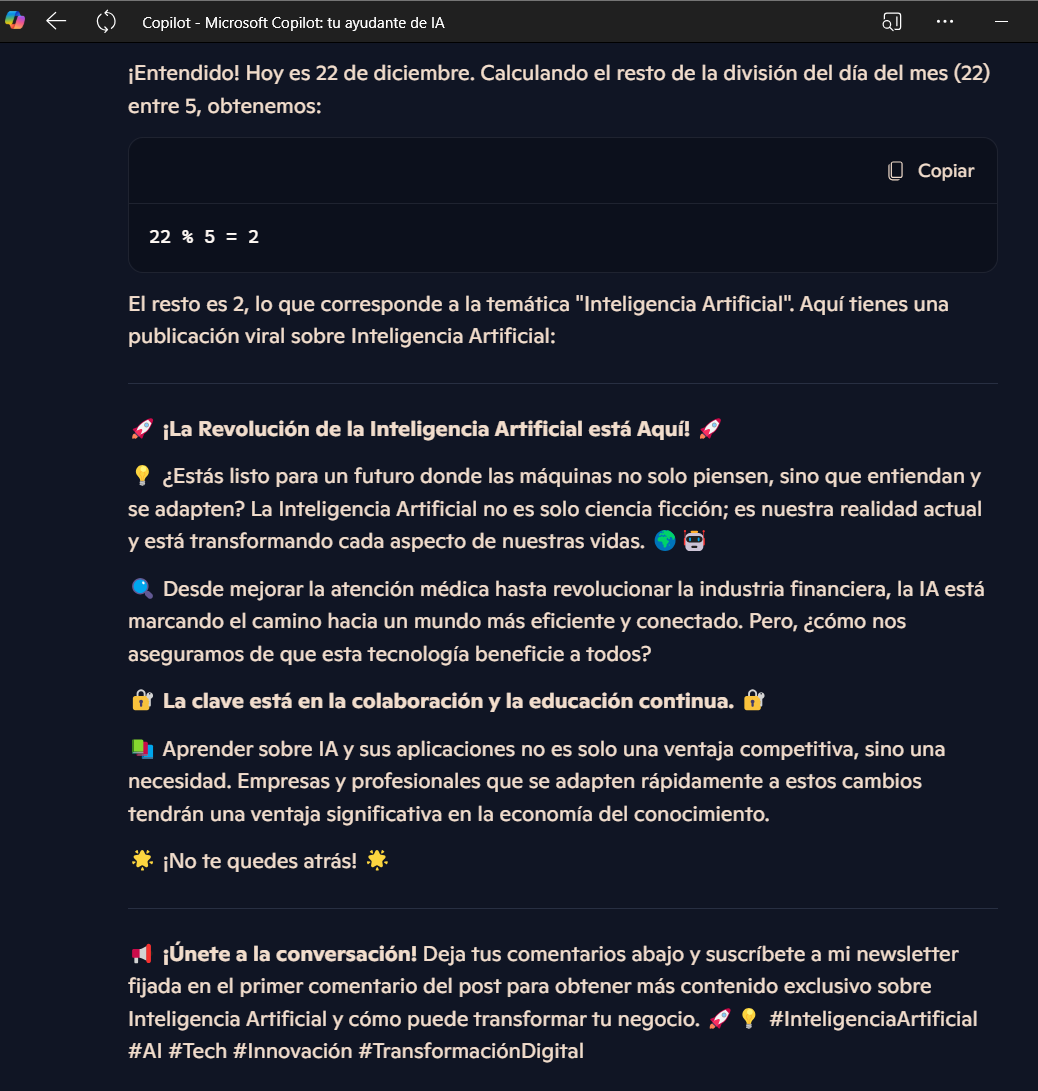


## Ejercicio 2 
En este segundo ejercicio vamos a desarrollar un programa que automatice esta tarea. Para ello se pide que el programa utilice una entrada y aplique el prompt generado en el ejercicio anterior en la librería de OpenAI. 

Para ello, como entrada se va a utilizar una noticia de las últimas semanas referente a la temática que toque según el día. En este caso al ser 22, la temática será la Inteligencia Artificial (valga la redundancia).

Por ello, comenzamos importando las librerías, conectándonos con el Token:

In [7]:
pip install openai

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from openai import OpenAI
client = OpenAI(api_key = '') # Se ha eliminado el token para no subirlo a un repositorio público.
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "user", "content": "Hola como estas?"},
  ]
)
print(response.choices[0].message.content)

Hola! Estoy bien, gracias. ¿Y tú? ¿En qué puedo ayudarte hoy?


Confirmamos que ya estamos conectados con OpenAI, así que vamos a descomponer un poco el prompt para incluirlo. En este caso, ya que le vamos a dar como entrada una noticia, se va a eliminar la parte de legir la temática basada en el día.

In [ ]:
prompt = "Eres un experto en crear publicaciones de LinkedIn virales. Quiero que me ayudes a crear post virales de LinkedIn para mi cuenta profesional sobre las siguientes áreas: Ciberseguridad, Cloud Computing, Inteligencia Artificial, Azure y Zero Trust. Quiero que realices una publicación viral completa de alguna de las areas definidas utilizando emojis y hastagsh para llegar a más gente. Necesito que sobretodo las primeras líneas llamen mucho la atención para que la gente quiera leer la publicación completa. Estas publicaciones deben generar una llamada a la acción en el lector, invitándole a suscribirse a mi newsletter fijada en el primer comentario del post o dejándo un comentario."
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role":  "user", "content": prompt},
  ]
)
print(response.choices[0].message.content)

¡Claro! Aquí te dejo un ejemplo de publicación viral para la sección de Ciberseguridad:

🔒 ¿Sabías que cada año se producen millones de ciberataques en todo el mundo? Protege tus datos con los últimos avances en #Ciberseguridad. Descubre cómo mantener tu información segura en un mundo digitalmente conectado. 💻🛡️ #Ciberseguridad #SeguridadInformatica

🔐 No te pierdas ninguna novedad en el mundo de la Ciberseguridad, ¡suscríbete a mi newsletter para recibir todos los consejos y actualizaciones! 📧✉️ ¿Buscas proteger tus datos? Déjame un comentario y te ayudaré a encontrar la mejor solución para ti. 👍👩‍💻

Espero que este ejemplo te sea útil. Si necesitas más publicaciones virales para las otras áreas, no dudes en pedírmelas. ¡Estaré encantado de ayudarte a lograr una mayor visibilidad en LinkedIn!


Vemos que el prompt funciona y nos genera un par de publicaciones similares a las generadas en la interfaz WEB. Ahora se va a modificar el código para utilizar una entrada. Lo vamos a encapsular en una función para poder probar su fuincionamiento con varias entradas:

In [10]:
entrada = "Una nueva vulnerabilidad en sistemas IoT ha dejado expuestos datos sensibles, lo que subraya la importancia de un enfoque Zero Trust en ciberseguridad."  # Ejemplo de entrada externa
def modelo(entrada):
    prompt = f"""
    Eres un experto en crear publicaciones de LinkedIn virales. 
    Quiero que me ayudes a crear post virales de LinkedIn para mi cuenta profesional sobre las siguientes áreas: 
    Ciberseguridad, Cloud Computing, Inteligencia Artificial, Azure y Zero Trust. 

    Quiero que realices una publicación viral completa basada en el siguiente tema: 

    "{entrada}"

    Utiliza emojis y hashtags para llegar a más gente. 
    Necesito que sobretodo las primeras líneas llamen mucho la atención para que la gente quiera leer la publicación completa. 
    Estas publicaciones deben generar una llamada a la acción en el lector, invitándole a suscribirse a mi newsletter fijada en el primer comentario del post o dejando un comentario.
    """

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "user", "content": prompt},
        ]
    )
    return response.choices[0].message.content

print(modelo(entrada))

🔒🌐 ¡Alerta de seguridad! Una nueva vulnerabilidad en sistemas IoT pone en riesgo datos sensibles 😱. Descubre cómo el enfoque Zero Trust en ciberseguridad puede proteger tu información confidencial. #Ciberseguridad #ZeroTrust #IoTvulnerability

¿Estás preparado para proteger tus datos de posibles ataques? Suscríbete a mi newsletter para recibir consejos y actualizaciones sobre ciberseguridad, Cloud Computing, Inteligencia Artificial, Azure y más. ¡Déjame un comentario si quieres más información! 💻🔐🔍

¡Juntos podemos mantener nuestros datos seguros en un mundo digital cada vez más vulnerable! 💪🛡️ #SeguridadInformatica #ProtegeTusDatos


In [15]:
# CIBERSEGURIDAD
entrada = "Ataque de malware a WordPress: Un malware con una gravedad de 9,8 sobre 10 ha afectado a WordPress"
print(modelo(entrada))

🚨 ¡Atención! Un ataque de malware con una gravedad de 9,8 sobre 10 ha sacudido a WordPress 😱 ¡Descubre cómo protegerte ahora! #ciberseguridad #cloudcomputing #inteligenciaartificial #azure #zerotrust

¡Protege tu WordPress y tus datos! ¿Quieres recibir más consejos de seguridad? Suscríbete a mi newsletter en el primer comentario o deja un comentario. Juntos podemos mantenernos seguros en línea. 💪🔒


In [12]:
# CLOUD COMPUTING
entrada = "La nube, motor de transformación empresarial en un mundo 'multicloud"
print(modelo(entrada))

¡La era de la nube ha llegado para revolucionar la manera en que las empresas operan! ☁️🚀 En un mundo 'multicloud', la transformación empresarial es clave para la eficiencia y la escalabilidad. Descubre cómo la ciberseguridad, el Cloud Computing, la Inteligencia Artificial, Azure y Zero Trust juegan un papel fundamental en este proceso. #TransformaciónEmpresarial #Multicloud 💼🔒

¿Estás listo para llevar tu empresa al siguiente nivel? Suscríbete a mi newsletter para estar al tanto de las últimas tendencias en tecnología y seguridad empresarial. ¡Déjame un comentario si estás listo para comenzar este viaje juntos! 💪📩 #LinkedInViral #InnovaciónEmpresarial


In [16]:
# INTELIGENCIA ARTIFICIAL
entrada = "Deepfake y estafas: El FBI ha descubierto un aumento en el uso de deepfakes para estafar a las personas. Los ciberdelincuentes están utilizando esta tecnología para alterar imágenes y videos, lo que puede tener serias implicaciones para la privacidad y la seguridad personal"
print(modelo(entrada))

🔒💻 ¡Alerta de seguridad! El FBI advierte sobre el uso de deepfakes en estafas 😱 ¡Descubre cómo protegerte! 

#Deepfake #Ciberseguridad #Privacidad #Estafas

Los deepfakes son una nueva herramienta peligrosa en manos de los ciberdelincuentes. Protege tu privacidad y seguridad personal ante esta amenaza creciente. ¿Quieres recibir más consejos de expertos en ciberseguridad? Suscríbete a mi newsletter en el primer comentario o déjame tu comentario para más información. ¡No te arriesgues! #LinkedInViral #SeguridadCibernética #ProtegeTuInformación #SuscríbeteAhora 🛡️🔐


In [13]:
# AZURE
entrada = "Construyendo seguridad resiliente en la nube con Azure"
print(modelo(entrada))

🔒💻 Construye un futuro seguro en la nube con Azure ☁️ ¡Descubre cómo construir seguridad resiliente en la nube y proteger tu información con tecnología de vanguardia! 💪 #Ciberseguridad #CloudComputing #InteligenciaArtificial #Azure #ZeroTrust

¿Quieres aprender más sobre cómo proteger tus datos en la nube? ¡Suscríbete a mi newsletter para recibir contenido exclusivo y estar al tanto de todas las novedades! 📧🔒 #SeguridadEnLaNube #ProtegeTuInformación #Newsletter #ComentaSiQuieresAprenderMás


In [14]:
# ZERO TRUST
entrada = "Agile Business, agile security: How AI and Zero Trust work together"
print(modelo(entrada))

🔒💭 "¿Cómo pueden la Inteligencia Artificial y el Zero Trust colaborar para lograr una seguridad ágil en las empresas? Descúbrelo en este post viral de LinkedIn! 🔥 #Ciberseguridad #CloudComputing #Azure #AI #ZeroTrust #SeguridadÁgil 

¡No te pierdas esta información clave para proteger tu negocio y mantente al tanto de las últimas tendencias en seguridad empresarial! Suscríbete a mi newsletter en el primer comentario o déjame un comentario con tus pensamientos. Juntos podemos hacer de nuestras empresas un lugar más seguro y eficiente. 💪💻"


El resultado no me termina de convencer así que voy a probar a mejorarlo utilizando el modelo gpt-4 y pidiendo a un llm que optimice mi prompt:

In [18]:
def modelo(entrada):
    prompt = f"""
Eres un experto en marketing digital y creación de contenido viral en LinkedIn. 
Tu tarea es crear una publicación de LinkedIn que cumpla con los siguientes criterios:

1. **Atraer la atención de la audiencia desde el primer segundo.**
   - La primera línea debe ser impactante y provocar curiosidad.

2. **Utilizar un tono profesional pero accesible**, adecuado para un público en el ámbito de la tecnología y la innovación.

3. **Incluir emojis estratégicamente** para mejorar la visibilidad y el alcance.

4. **Generar una llamada a la acción clara**: invita a los usuarios a interactuar en los comentarios o a suscribirse a mi newsletter (que estará en el primer comentario del post).

5. **Abordar el siguiente tema de manera concreta y detallada**: 
   "{entrada}"

6. **Usar hashtags relevantes** al final para ampliar el alcance del post. 
   Incluye hashtags que se alineen con el tema de la publicación.
"""

    response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "user", "content": prompt},
        ]
    )
    return response.choices[0].message.content


In [19]:
# CIBERSEGURIDAD
entrada = "Ataque de malware a WordPress: Un malware con una gravedad de 9,8 sobre 10 ha afectado a WordPress"
print(modelo(entrada))

🔥🔒¡ALERTA DE SEGURIDAD! ¿SABÍAS QUE WORDPRESS FUE VICTIMA DE UN MALWARE CON UNA GRAVEDAD DE 9,8 SOBRE 10?🔒🔥

Hay una amenaza silente que se cierne sobre nosotros en el ciberespacio. Nuestros sitios web, siendo WordPress el blanco más reciente, han sido atacados por un malware de preocupante gravedad: 9,8 sobre 10 😱 

📉 El daño que puede causar esta infección es enorme, y en la era de la transformación digital, es esencial poner manos a la obra y aprender a proteger nuestros actos e información en el ciberespacio🌐. 

Esto nos lleva a la urgente necesidad de abordar el ciberataque que identificamos en WordPress. Nuestro análisis detallado reveló cómo el malware se infiltró, qué vulnerabilidades explotó y qué puedes hacer para reforzar la seguridad de tu sitio web 🛡. 

Estoy preparando una edición especial de mi newsletter que explicará paso a paso cómo protegerte de este tipo de ataques 👨‍💻. Si te preocupa la seguridad de tu sitio en WordPress y te gustaría aprender más sobre cómo defend

In [20]:
# CLOUD COMPUTING
entrada = "La nube, motor de transformación empresarial en un mundo 'multicloud"
print(modelo(entrada))

💥"¡La nube no es solo el futuro, es el AHORA!☁️"💥

Estamos viviendo una revolución sin precedentes. La nube ha dejado de ser simplemente una tendencia emergente para convertirse en el motor principal de la transformación empresarial en nuestra era digital y multicloud.💼🌐

El mundo multicloud es intrincado pero también generoso en oportunidades. Para las empresas, una estrategia multicloud bien implementada puede reducir costos, aumentar la productividad y mejorar la protección de datos.✅ Pero eso no es todo. Gracias a la nube, la innovación está al alcance de la mano y puede ocurrir en cualquier momento, en cualquier lugar.💡

Tener la capacidad de comprender y adoptar de manera efectiva las tecnologías de la nube es la clave. Son herramientas imprescindibles para sobrevivir y prosperar en este ecosistema empresarial en constante evolución.🚀

¿Te parece que la nube está cambiando sólo las empresas? ¡Piénsalo dos veces! Está cambiando al mundo entero y si aún no te has subido al tren, te

In [21]:
# INTELIGENCIA ARTIFICIAL
entrada = "Deepfake y estafas: El FBI ha descubierto un aumento en el uso de deepfakes para estafar a las personas. Los ciberdelincuentes están utilizando esta tecnología para alterar imágenes y videos, lo que puede tener serias implicaciones para la privacidad y la seguridad personal"
print(modelo(entrada))

💻🕵️‍♂️ #Deepfake se ha convertido en el arma perfecta para los ciberdelincuentes. ¿Estás preparado para enfrentarlo?

La capacidad para manipular no sólo fotos, sino también videos, ha planteado serias preocupaciones acerca de cómo los deepfakes pueden ser usados malintencionadamente para estafar a las personas desprevenidas. El FBI está alertando del aumento en el uso de esta tecnología avanzada para engaños de alto nivel.

Además de ser utilizada para crear contenido online falsificado y desinformación, 🕵️‍♀️ los estafadores ahora están creando deepfakes de voz y video para hacerse pasar por personas de confianza, y cómo no, por famosos 👨‍🎤💰. Esto puede causar un daño irreparable a la reputación 🎭 de alguien y causar confusión y descrédito.

🛡️ Por lo tanto, es imperativo aprender a detectar estas amenazas e implementar soluciones adecuadas para evitarlas. Dado que el escenario sigue en constante evolución, las respuestas no pueden ser unidimensionales. La tecnología, 🧠 las habilidad

In [22]:
# AZURE
entrada = "Construyendo seguridad resiliente en la nube con Azure"
print(modelo(entrada))

⚠️🔑 ¿Tus activos digitales corren peligro? ¡Hoy, el 100% de las empresas globales están en riesgo! ⚠️🔒

Hablemos de #SeguridadResiliente en la nube 🌤️ y cómo puedes fortalecer tu gestión de riesgos con #Azure. 🚀 No, esto no es una moda... ¡es el futuro!🔮

✅ Azure tiene NETSEC para implementar políticas de seguridad, detectar amenazas en tiempo real y responder de manera inmediata. 🛡️⚔️

✅ Incorpora IA y Machine Learning para prever comportamientos sospechosos y evitar fugas de información. 🤓💽

✅ Y no lo olvides, te permite realizar copias de seguridad de tus datos con apenas un clic.🖱️📁

¿Quieres más información o necesitas ayuda para implementar Azure en tu empresa? 🤔💡 Te invito a aclarar tus dudas en los comentarios. 👇

¿No quieres perderte ninguna actualización sobre tecnología y seguridad en la nube? Suscríbete a mi newsletter. El link está en el primer comentario. 📫💼

Súmate a crear un mundo digital más seguro 🌐🔐💼

#Cybersecurity #CloudComputing #Azure #DigitalAssets #Innovation #

In [23]:
# ZERO TRUST
entrada = "Agile Business, agile security: How AI and Zero Trust work together"
print(modelo(entrada))

🚀💻 "Estas en una carrera contra el tiempo... y tu competencia más formidable es el futuro. ¿Está tu negocio realmente listo para ello?" 🤔

Como experto en tecnología e innovación, te habrás encontrado con estos dos términos en algún momento: 'Agile Business' y 'Zero Trust'. Pero, ¿sabías que la Inteligencia Artificial (IA) es el puente que une estos conceptos y fortalece la seguridad de tu negocio de manera eficiente y eficaz? 🌉🔒

Veámoslo desde este enfoque: Agile Business se trata de adaptar rápidamente a los cambios, apuntando a la eficacia y reduciendo el desperdicio. Por otro lado, Zero Trust es un modelo de seguridad que supone que cualquier intento de acceso es potencialmente dañino, independientemente de si proviene de dentro o fuera de la organización. 🔄🚫

Ahora bien, la IA entra en juego aquí como una herramienta que apoya la transición hacia un entorno Agile, promoviendo la automatización y la toma de decisiones en tiempo real, así como en la implementación de Zero Trust, me

Los resultados ahora son infinítamente mejores y también tarda bastante más en obtener una respuesta al utilizar un modelo más avanzado.

## Conclusiones
En este módulo he aprendido bastante sobre como utilizar mejor los modelos LLMs que usamos día a día, optimizando mis consultas para obtener mejores resultados. 

Creo que la práctica ha sido bastante divertida y he puesto en práctica todo lo aprendido en el módulo. 